In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset
data = pd.read_csv("train.csv")
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [2]:
# Step 2: Handle Missing Values
# Define an imputer for filling in missing values, customizing as needed.
# For numerical features, we fill with the mean. For categorical features, we use the most frequent value.
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

# Separate numerical and categorical features for separate treatment
num_features = data.select_dtypes(include=[np.number]).columns
cat_features = data.select_dtypes(exclude=[np.number]).columns

data[num_features] = num_imputer.fit_transform(data[num_features])
data[cat_features] = cat_imputer.fit_transform(data[cat_features])

In [3]:
# Step 3: Remove Duplicates
data.drop_duplicates(inplace=True)
print('Data shape after removing duplicates: ', data.shape)

Data shape after removing duplicates:  (1460, 81)


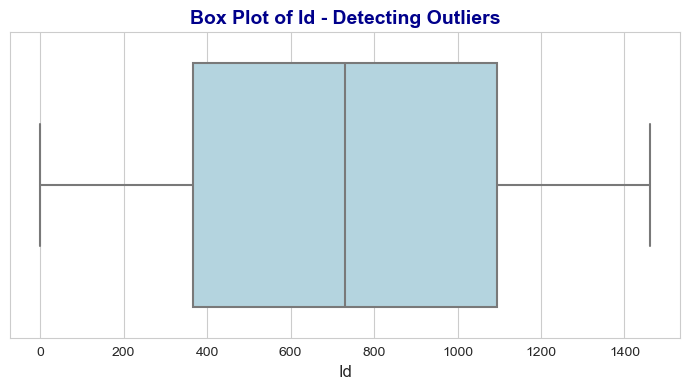

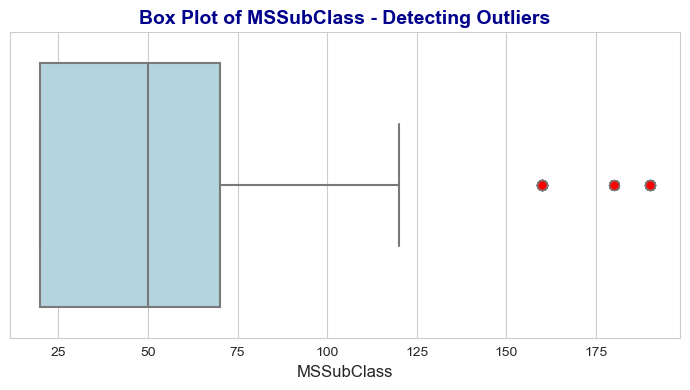

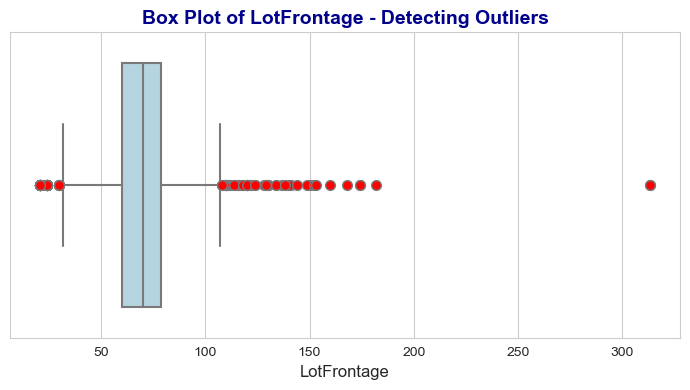

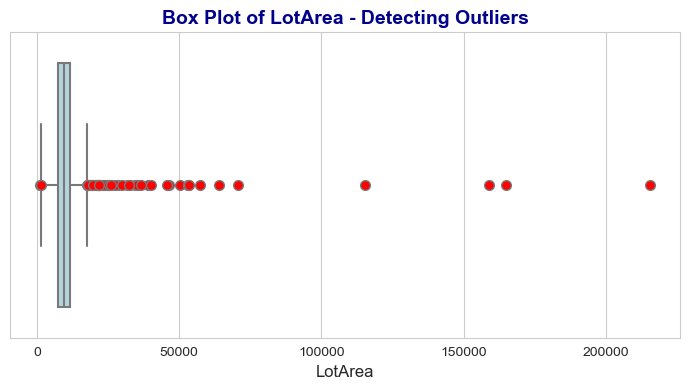

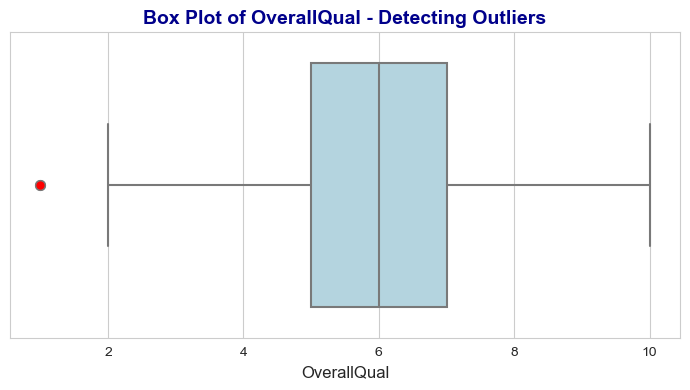

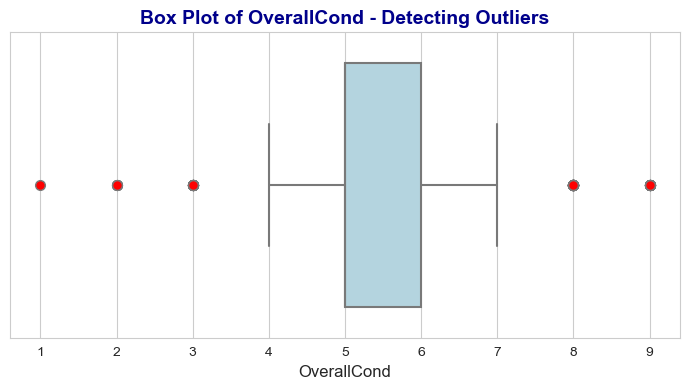

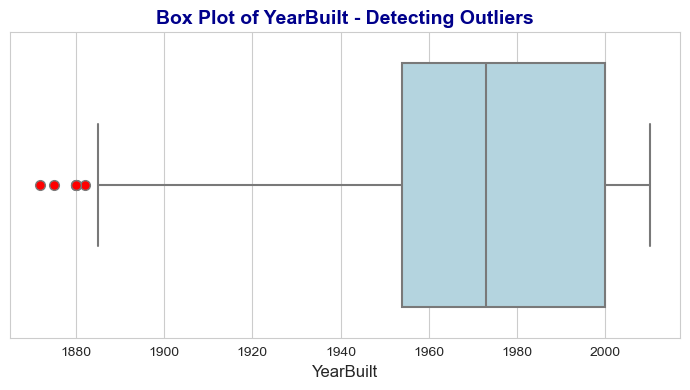

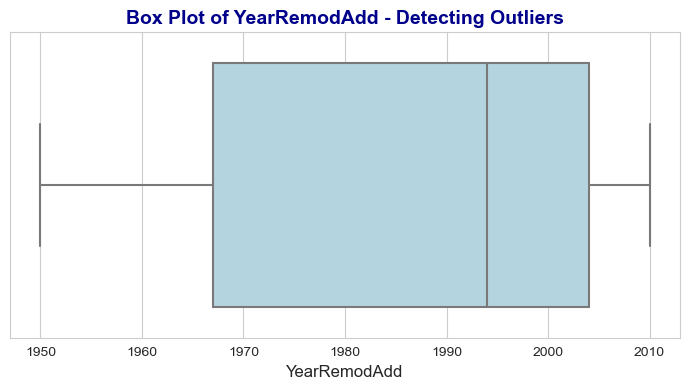

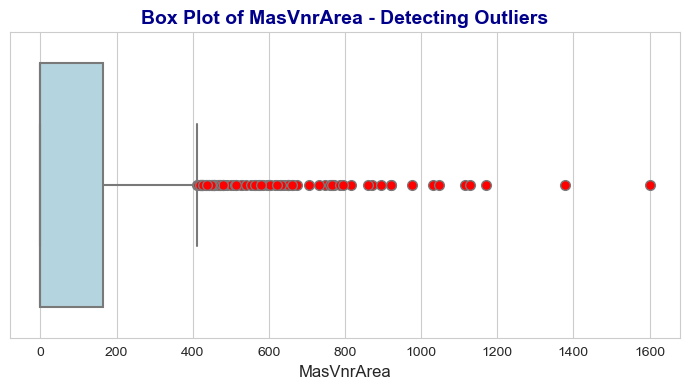

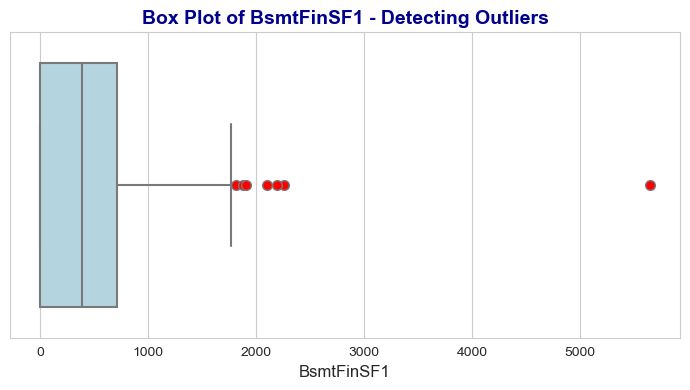

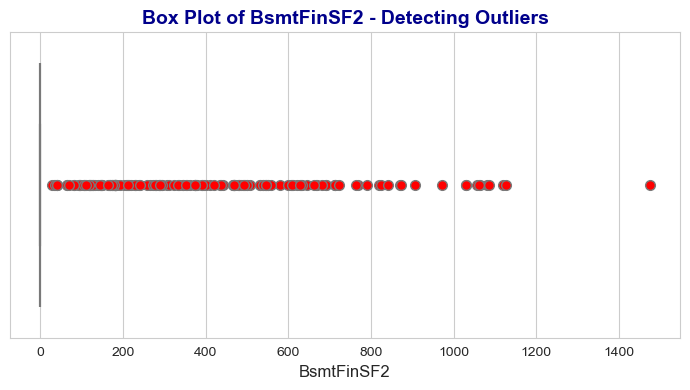

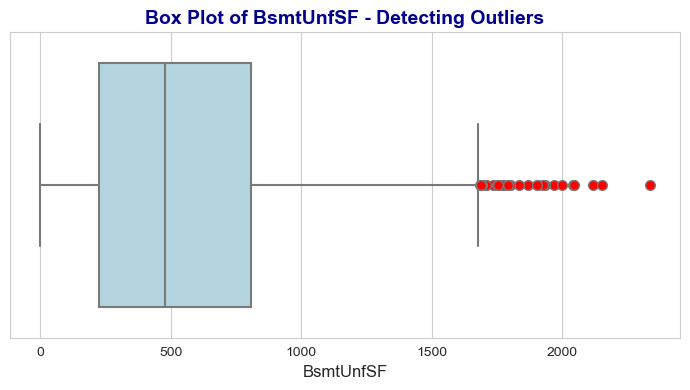

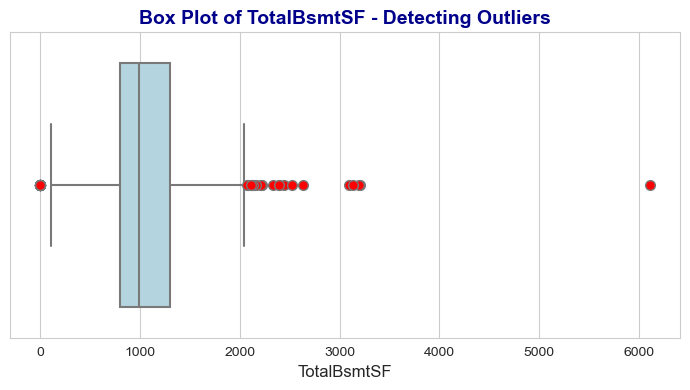

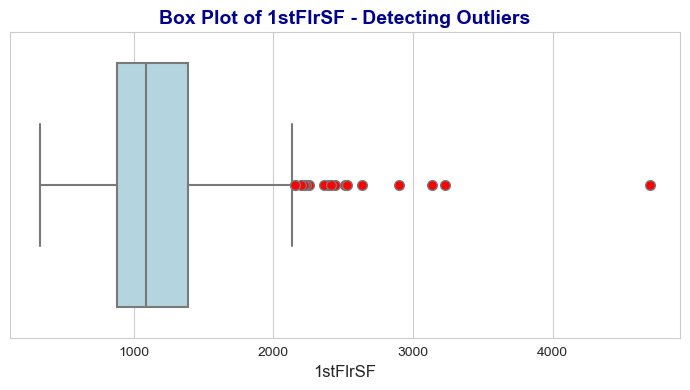

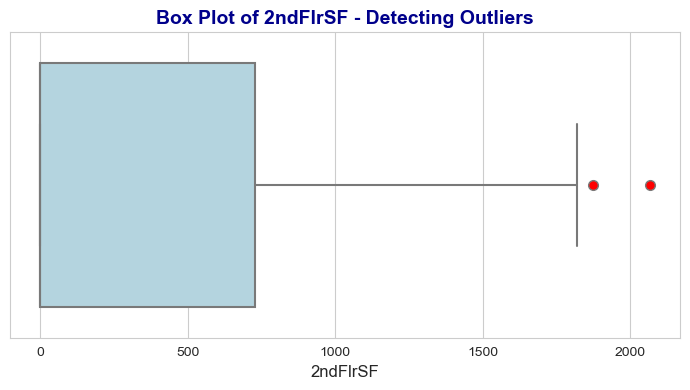

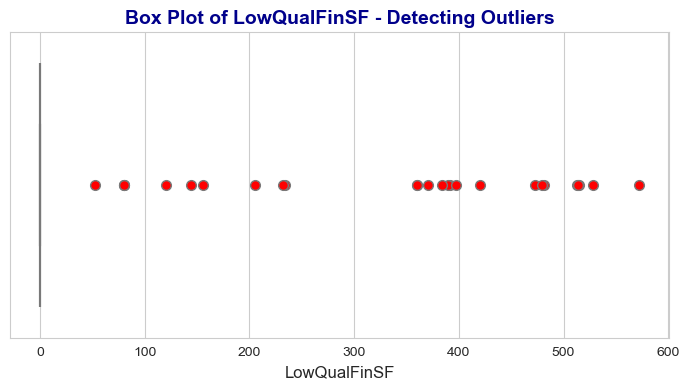

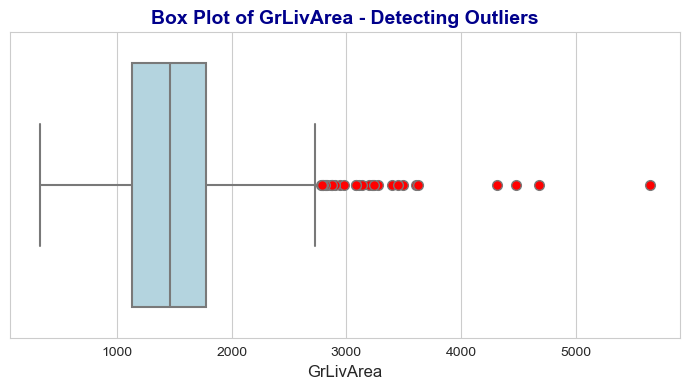

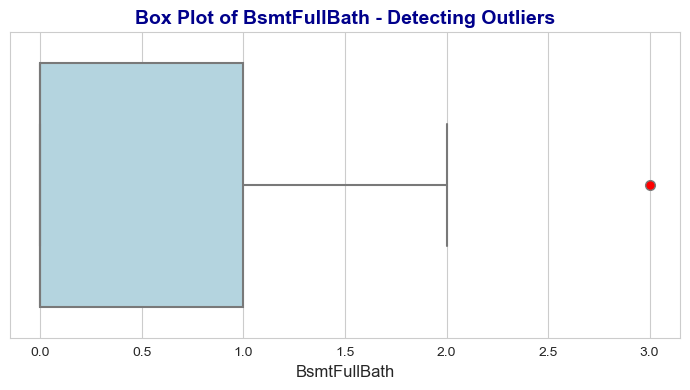

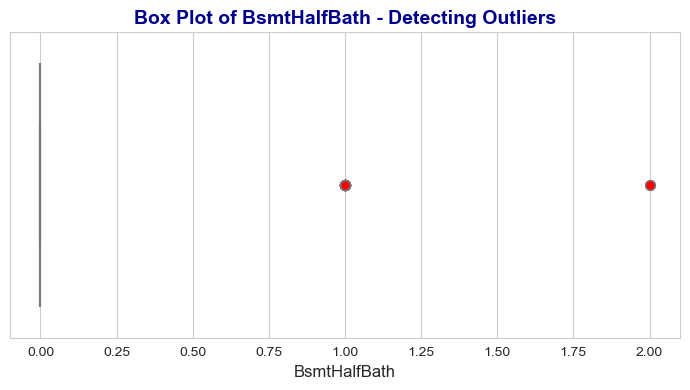

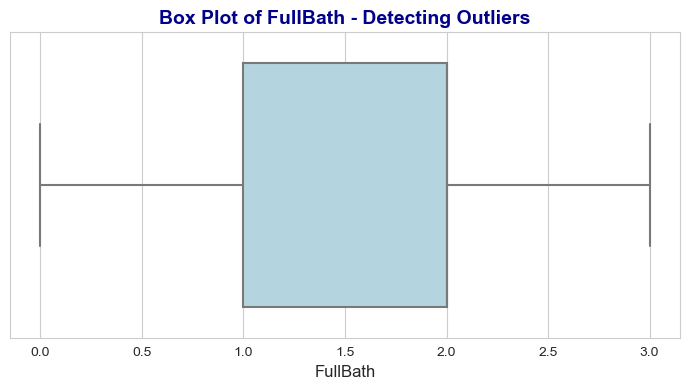

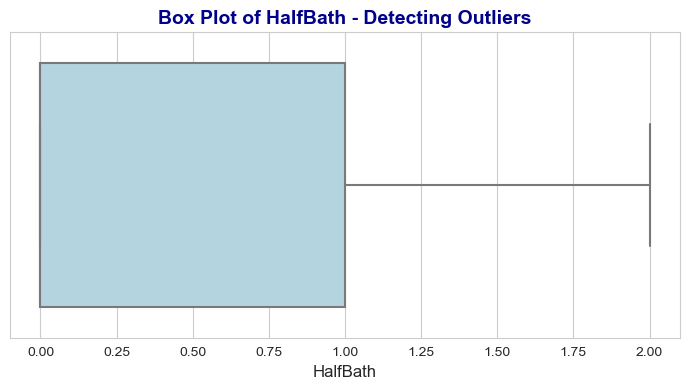

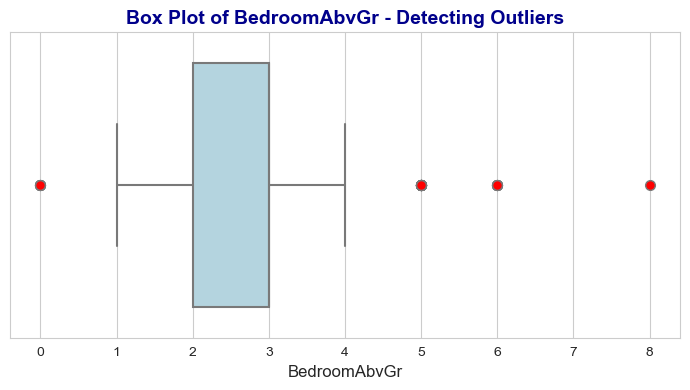

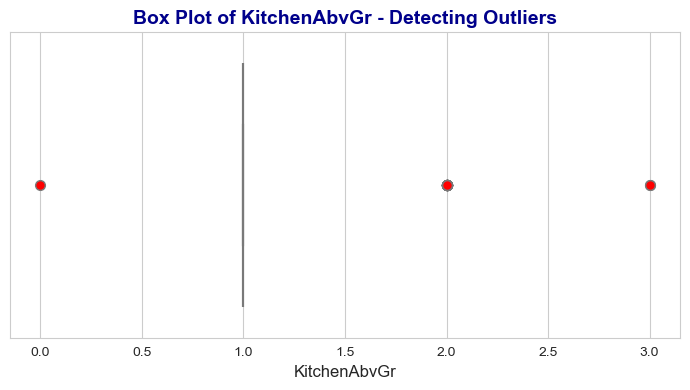

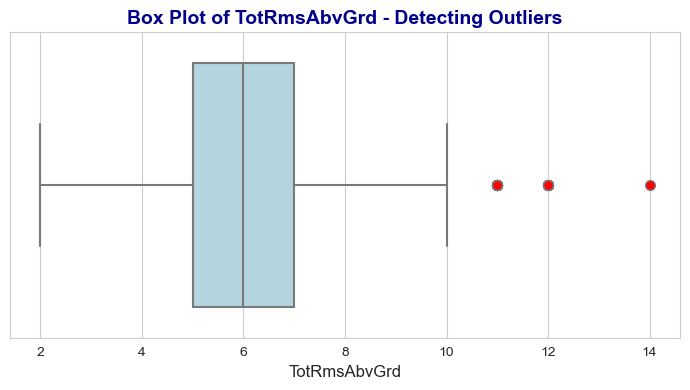

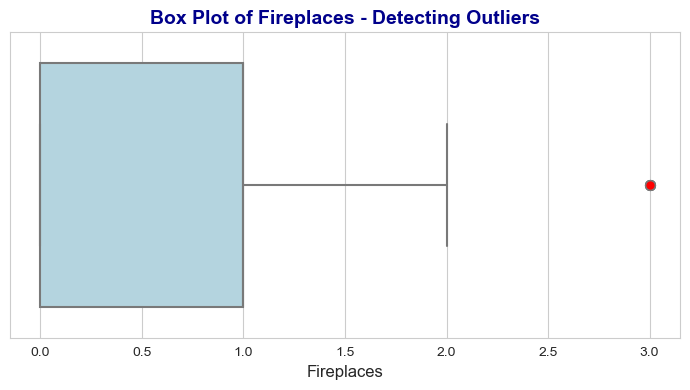

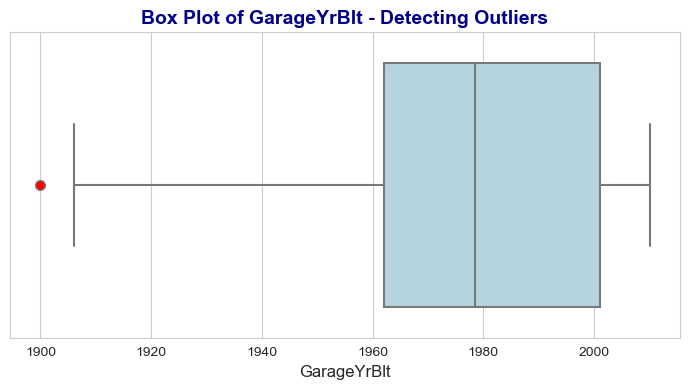

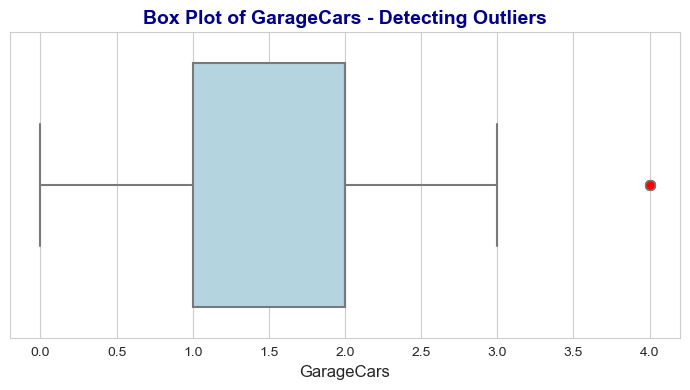

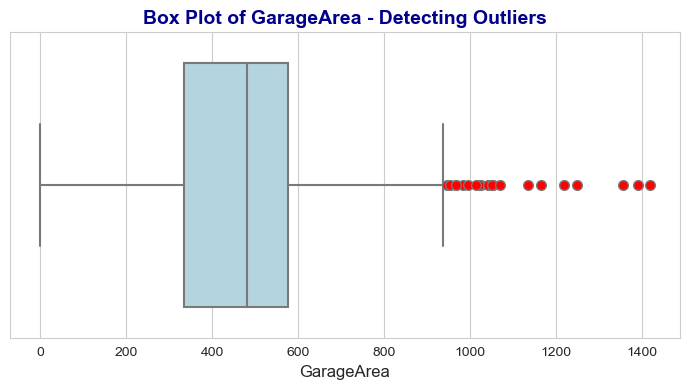

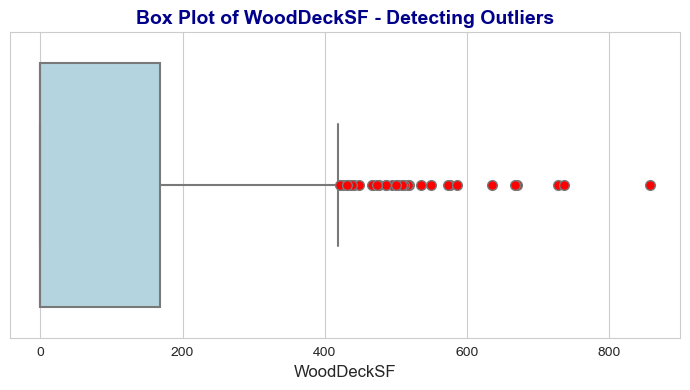

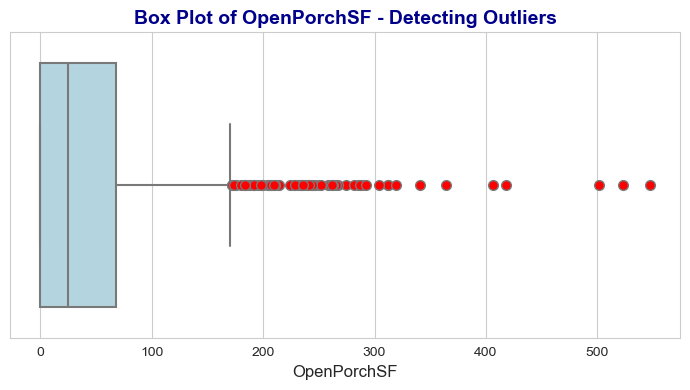

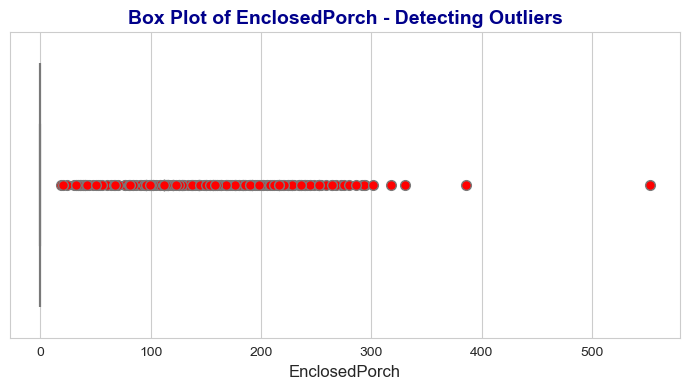

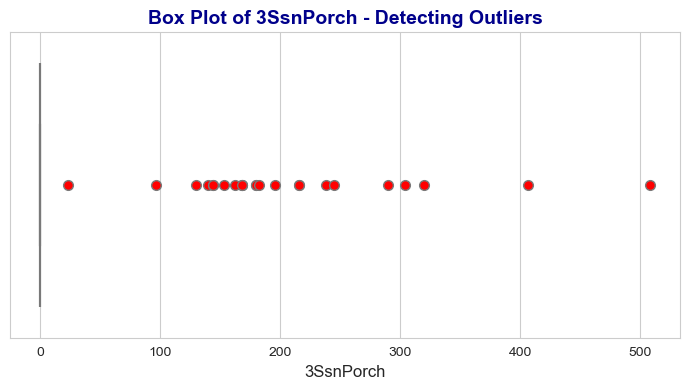

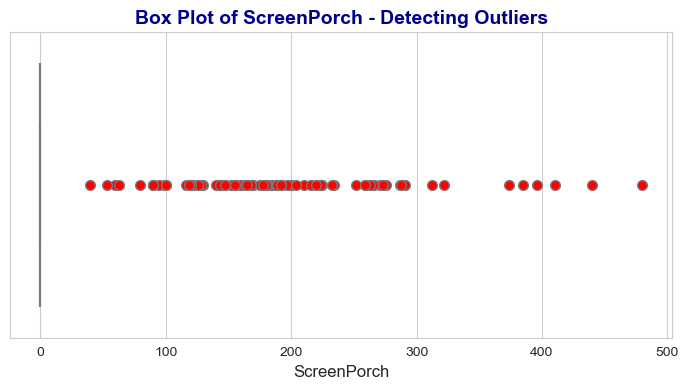

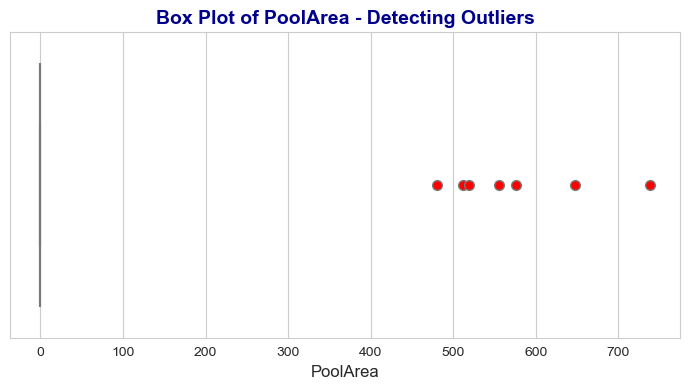

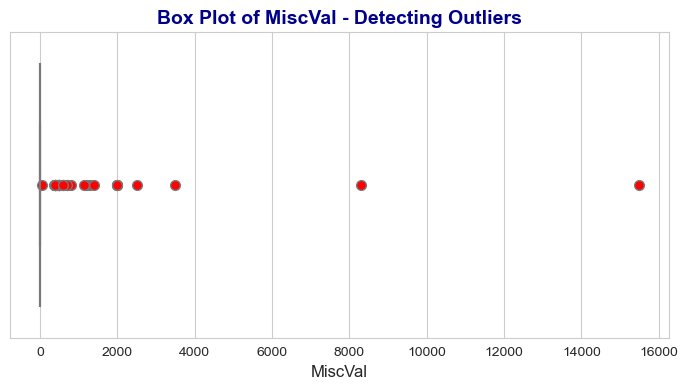

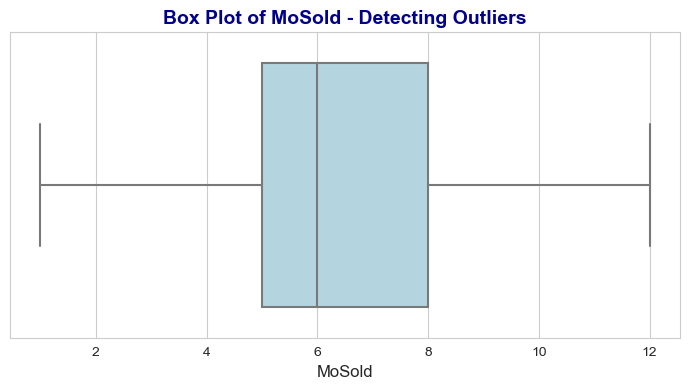

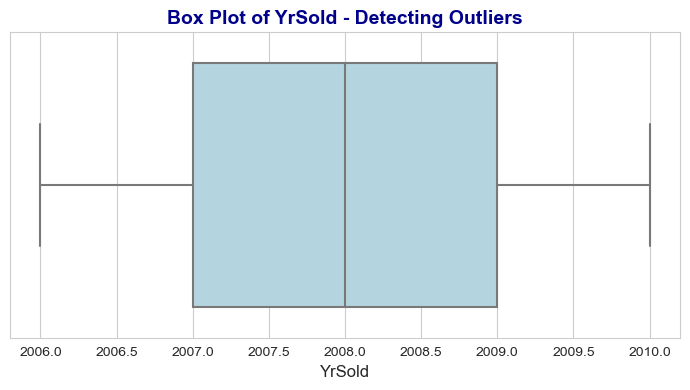

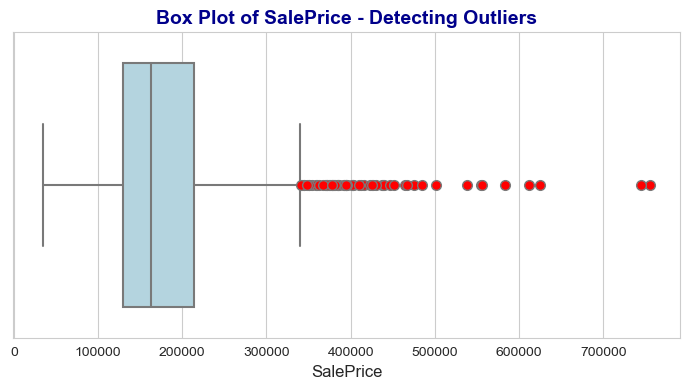

In [7]:
# Step:4 Box plots to visualize outliers
for col in num_features:
    plt.figure(figsize=(7, 4))  # Increased figure size for better clarity
    sns.set_style("whitegrid")  # Adds a clean background with grid lines
    sns.boxplot(
        x=data[col],
        color="lightblue",  # Set a custom color for the box plot
        linewidth=1.5,  # Thicker line for better visibility
        flierprops=dict(markerfacecolor='red', markersize=7, linestyle='none')  # Custom outlier styling
    )
    plt.title(f'Box Plot of {col} - Detecting Outliers', fontsize=14, weight='bold', color="darkblue")  # Customized title
    plt.xlabel(col, fontsize=12)  # Axis label with larger font
    plt.tight_layout()  # Adjusts plot to prevent overlap
    plt.show()

In [9]:
# Step 5: Encoding Categorical Features
# Use LabelEncoder for binary categories, and One-Hot Encoding for multi-category features
for col in cat_features:
    if data[col].nunique() == 2:
        # For binary categorical variables, use Label Encoding
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    else:
        # For multi-category variables, use One-Hot Encoding
        data = pd.get_dummies(data, columns=[col], drop_first=True)

In [13]:
# Step 6: Normalize and Standardize
# Scale features for consistency
scaler = StandardScaler()
data[num_features] = scaler.fit_transform(data[num_features])

# Final check of the prepared data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 246 entries, Id to SaleCondition_Partial
dtypes: bool(204), float64(38), int64(4)
memory usage: 770.1 KB
None


In [15]:
# Display summary statistics to get an overview of the data
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
                Id    MSSubClass   LotFrontage       LotArea       Street  \
count  1460.000000  1.460000e+03  1.460000e+03  1.460000e+03  1460.000000   
mean      0.000000 -8.455945e-17  4.075887e-16 -5.840077e-17     0.995890   
std       1.000343  1.000343e+00  1.000343e+00  1.000343e+00     0.063996   
min      -1.730865 -8.725628e-01 -2.227875e+00 -9.237292e-01     0.000000   
25%      -0.865432 -8.725628e-01 -4.564744e-01 -2.969908e-01     1.000000   
50%       0.000000 -1.631095e-01  6.454645e-16 -1.040633e-01     1.000000   
75%       0.865432  3.098594e-01  4.065156e-01  1.087080e-01     1.000000   
max       1.730865  3.147673e+00  1.103492e+01  2.051827e+01     1.000000   

             Alley    Utilities   OverallQual   OverallCond     YearBuilt  \
count  1460.000000  1460.000000  1.460000e+03  1.460000e+03  1.460000e+03   
mean      0.028082     0.000685  1.387018e-16  3.540547e-16  1.046347e-15   
std       0.165264     0.026171  1.000343e+00  1.000343

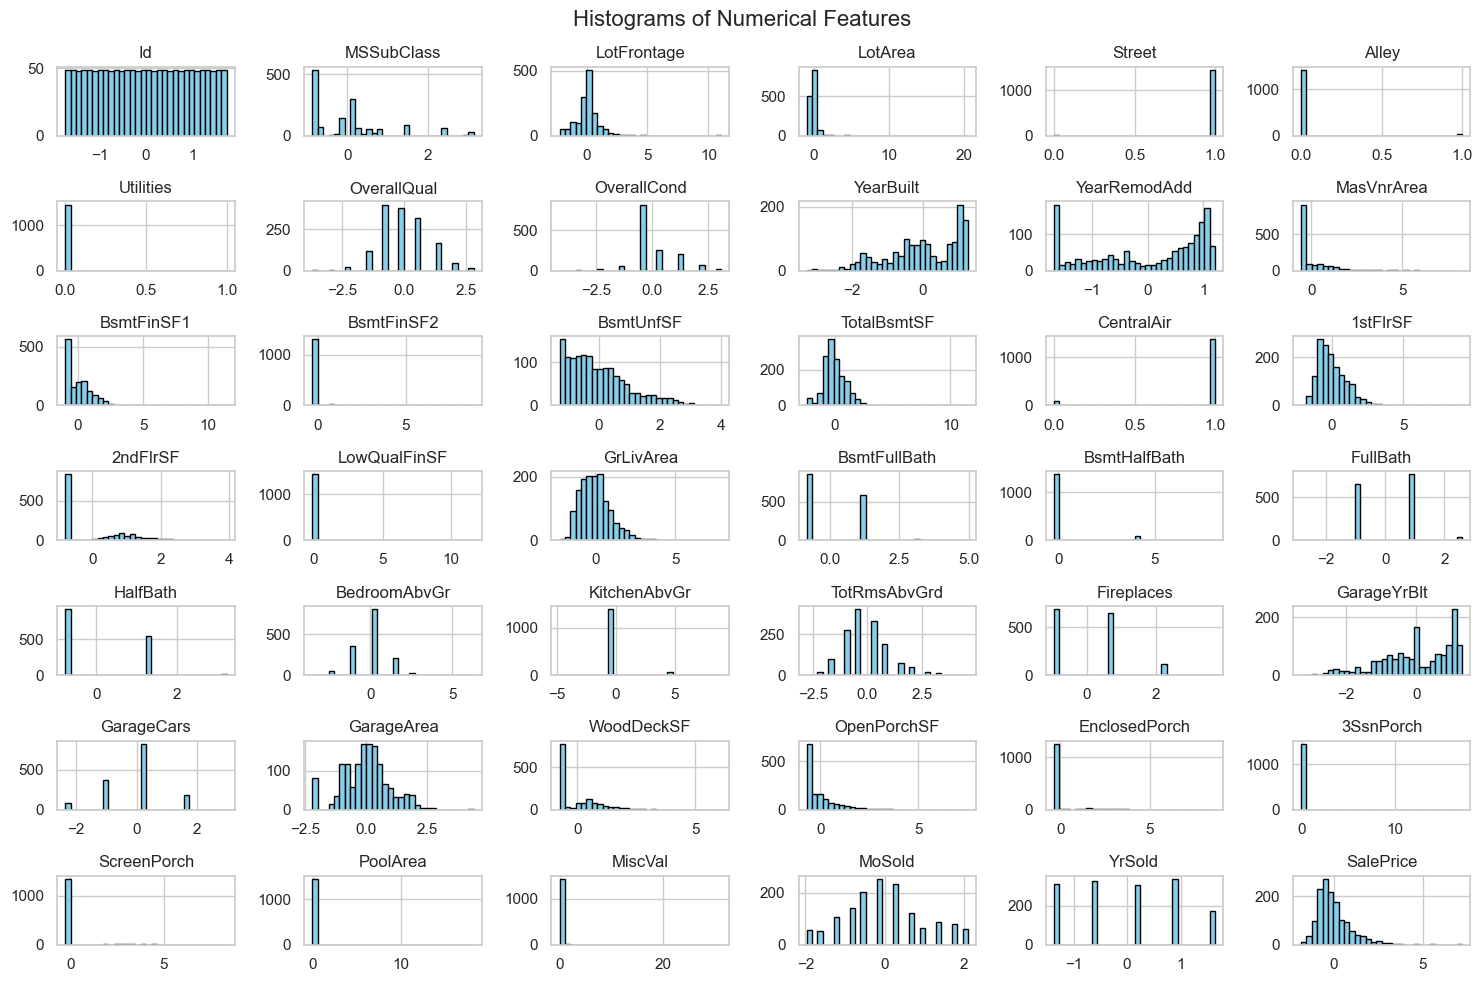

In [17]:
# Set seaborn style for better visualization
sns.set(style='whitegrid')

# Histograms for Numerical Features
num_features = data.select_dtypes(include=['int64', 'float64']).columns
data[num_features].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

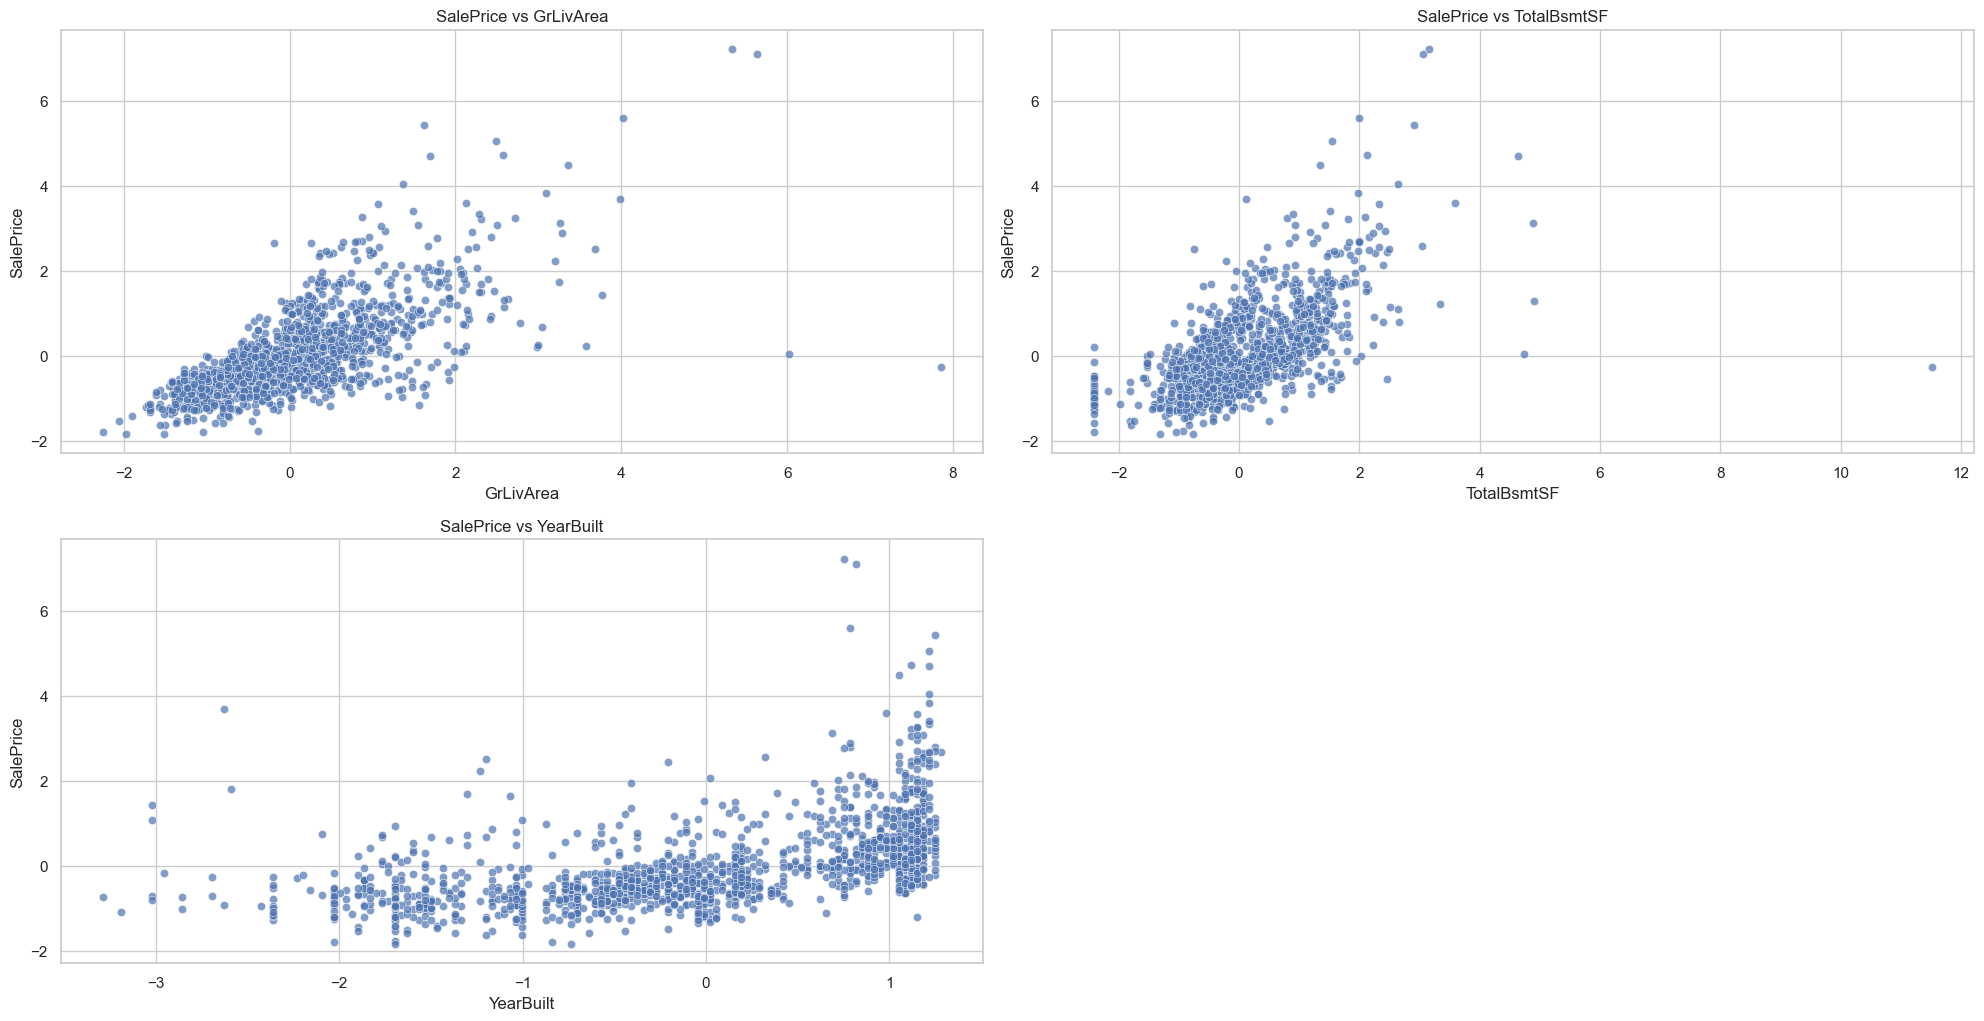

In [19]:
# Scatter Plots for Key Relationships (e.g., between SalePrice and other features)
# Selected features for scatter plots against SalePrice
features_to_plot = ['GrLivArea', 'TotalBsmtSF', 'YearBuilt']

# Create scatter plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)  # Adjust the layout based on the number of plots
    sns.scatterplot(data=data, x=feature, y='SalePrice', alpha=0.7)
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

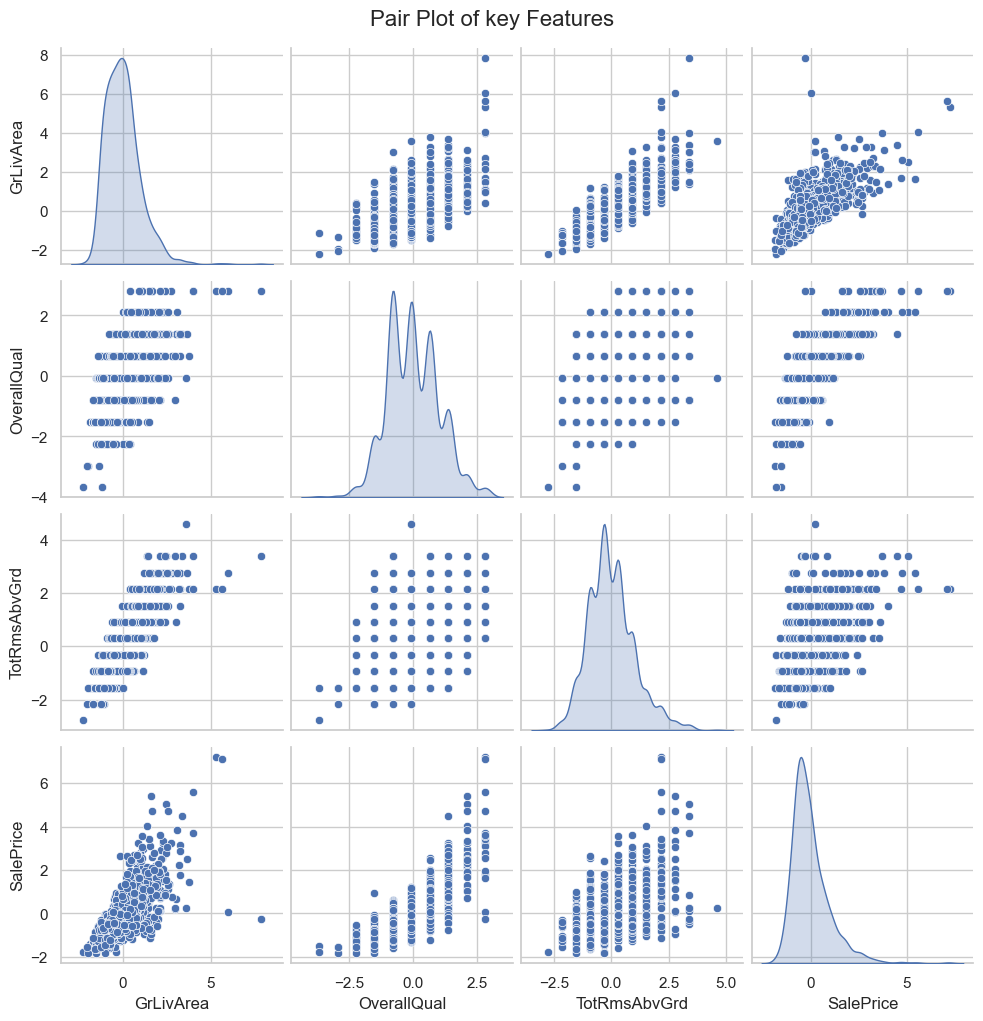

In [21]:
# Pair Plot for Key Features
selected_features = ['GrLivArea', 'OverallQual', 'TotRmsAbvGrd', 'SalePrice']
sns.pairplot(data[selected_features], diag_kind='kde', markers='o')
plt.suptitle('Pair Plot of key Features', fontsize=16, y=1.02)
plt.show()

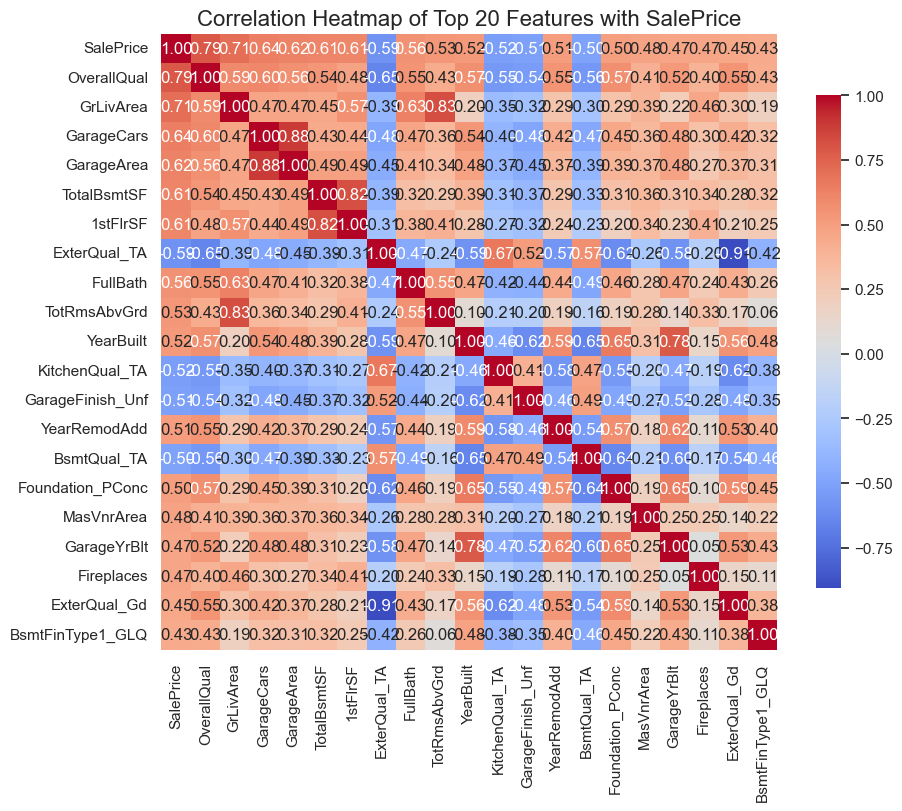

In [22]:
# Correlation Heatmap
# Calculate correlations
correlation_matrix = data.corr()

# Select the top 20 features most correlated with SalePrice
top_features = correlation_matrix['SalePrice'].abs().nlargest(21).index  # 20 features + SalePrice itself

# Creating a heatmap for the selected features
plt.figure(figsize=(10, 8))
sns.heatmap(data[top_features].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Top 20 Features with SalePrice', fontsize=16)
plt.show()

In [25]:
!pip install xgboost

In [27]:
# Importing necessary libraries for model selection and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Step 1: Separate Features and Target Variable
X = data.drop(columns=['SalePrice', 'Id'])  # Drop target and non-predictive columns
y = data['SalePrice']

# Step 2: Feature Selection - Select Top 20 Features
selector = SelectKBest(score_func=f_regression, k=20)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]
X = X[selected_features]  # Update X with selected features

print(selected_features)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_TA', 'BsmtFinType1_GLQ',
       'KitchenQual_TA', 'GarageFinish_Unf'],
      dtype='object')


In [29]:
# Step 3: Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Step 5: Training and Evaluating Models
# Dictionary to store results before hyperparameter tuning
initial_results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Evaluate model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    initial_results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

# Display initial results
print("Results before hyperparameter tuning:")
initial_results_df = pd.DataFrame(initial_results).T
print(initial_results_df)

Results before hyperparameter tuning:
                        MAE       MSE        R2
Linear Regression  0.302918  0.216626  0.821883
Random Forest      0.237304  0.137616  0.886847
Gradient Boosting  0.245047  0.146856  0.879250
XGBoost            0.251418  0.151426  0.875493


In [31]:
# Step 6: Hyperparameter Tuning with GridSearchCV
# hyperparameter grids
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Hyperparameter grids dictionary
param_grids = {
    'Random Forest': rf_param_grid,
    'XGBoost': xgb_param_grid
}

# Dictionary to store results after hyperparameter tuning
tuned_results = {}
best_models = {}

for model_name, model in models.items():
    if model_name in param_grids:  # Only tune models with specified hyperparameter grids
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        # Get the best model
        best_model = grid_search.best_estimator_
        best_models[model_name] = best_model
        
        # Predict and evaluate on test set
        y_pred = best_model.predict(X_test)
    else:
        # Use the original model for models without tuning
        best_models[model_name] = model
        y_pred = model.predict(X_test)

    # Evaluate model performance after tuning
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results after tuning
    tuned_results[model_name] = {
        'Best Params': grid_search.best_params_ if model_name in param_grids else "No Tuning",
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

# Display results after hyperparameter tuning
print("\nResults after hyperparameter tuning:")
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df)


Results after hyperparameter tuning:
                                                         Best Params  \
Linear Regression                                          No Tuning   
Random Forest      {'bootstrap': True, 'max_depth': 30, 'min_samp...   
Gradient Boosting                                          No Tuning   
XGBoost            {'colsample_bytree': 0.8, 'learning_rate': 0.0...   

                        MAE       MSE        R2  
Linear Regression  0.302918  0.216626  0.821883  
Random Forest      0.235654  0.138864  0.885822  
Gradient Boosting  0.245047  0.146856   0.87925  
XGBoost            0.233111  0.137763  0.886727  


In [32]:
# Creating a DataFrame for the documented results and improvements
results_data = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "XGBoost"],
    "MAE (Before)": [0.302918, 0.237304, 0.245047, 0.251418],
    "MSE (Before)": [0.216626, 0.137616, 0.146856, 0.151426],
    "R² (Before)": [0.821883, 0.886847, 0.879250, 0.875493],
    "MAE (After)": ["N/A", 0.235654, "N/A", 0.233111],
    "MSE (After)": ["N/A", 0.138864, "N/A", 0.137763],
    "R² (After)": ["N/A", 0.885822, "N/A", 0.886727]
}

# Converting the dictionary into a DataFrame
results_df = pd.DataFrame(results_data)

# Displaying the DataFrame as a table
results_df

,Model,MAE (Before),MSE (Before),R² (Before),MAE (After),MSE (After),R² (After)
0,Linear Regression,0.302918,0.216626,0.821883,N/A,N/A,N/A
1,Random Forest,0.237304,0.137616,0.886847,0.235654,0.138864,0.885822
2,Gradient Boosting,0.245047,0.146856,0.879250,N/A,N/A,N/A
3,XGBoost,0.251418,0.151426,0.875493,0.233111,0.137763,0.886727


In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor
import joblib

# Load the train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# List of categorical columns that need to be encoded
categorical_columns = ['ExterQual', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'KitchenQual', 'GarageFinish']

# Function to encode categorical features using LabelEncoder
def encode_categorical(data, columns):
    for col in columns:
        if col in data.columns and data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col].astype(str))
    return data

# Apply encoding to both train and test data
train_data = encode_categorical(train_data, categorical_columns)
test_data = encode_categorical(test_data, categorical_columns)

# Selected features for the model (adjusted for available columns)
selected_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
                     '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
                     'GarageYrBlt', 'GarageCars', 'GarageArea', 'ExterQual', 'Foundation', 
                     'BsmtQual', 'BsmtFinType1', 'KitchenQual', 'GarageFinish']

# Check for missing features in the selected list
missing_features = [feature for feature in selected_features if feature not in train_data.columns]
if missing_features:
    print(f"Missing Features: {missing_features}")
else:
    print("All selected features are available.")

All selected features are available.


In [34]:
# Prepare the training data
X_train = train_data[selected_features]
y_train = train_data['SalePrice']

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the XGBoost model
xgboost_model = XGBRegressor(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=30,
    min_child_weight=1,
    n_estimators=1000,
    subsample=0.8
)

xgboost_model.fit(X_train_scaled, y_train)

# Save the trained model and scaler
joblib.dump(xgboost_model, 'xgboost_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [35]:
# Prepare the test data
X_test = test_data[selected_features]
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test set
y_pred = xgboost_model.predict(X_test_scaled)

# Format the predictions to 3 decimal places
y_pred = [round(value, 3) for value in y_pred]

# Create a DataFrame with ID and predicted sale price
output = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': y_pred
})

# Save the predictions to a new CSV file
output.to_csv('submission.csv', index=False)

In [36]:
# Print the first few rows of the output
print(output.head())

     Id      SalePrice
0  1461  125358.656250
1  1462  146239.953125
2  1463  181640.000000
3  1464  200172.156250
4  1465  196936.937500
